# Bike Sharing Assignment

### STEP 1:Reading and understanding data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Reading the data from csv file

df1 = pd.read_csv('day.csv')

In [4]:
# Checking the head of the dataset

df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# checking the shape of dataframe

df1.shape

(730, 16)

In [6]:
# describing the columns of dataframe

df1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# get the info about columns

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
# checking for the null values

df1.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### VIEWS

##### 1. The dataset has 730 rows and 16 columns

###### 2. no null values were found

#### Dropping the unwanted columns

In [9]:
# Instant column contains index for the row so it can be dropped
# dteday has the date, we can utilize year and month column
# We can also drop casual and registered column

In [10]:
df1.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [11]:
df1.shape

(730, 12)

#### Encoding/mapping season column, month column, weekday column, weathersit column

In [12]:
df1.season = df1.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df1.mnth = df1.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df1.weekday = df1.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
df1.weathersit = df1.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [13]:
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# STEP 2: VISUALISING THE DATA

In [14]:
# visualising the numerical data

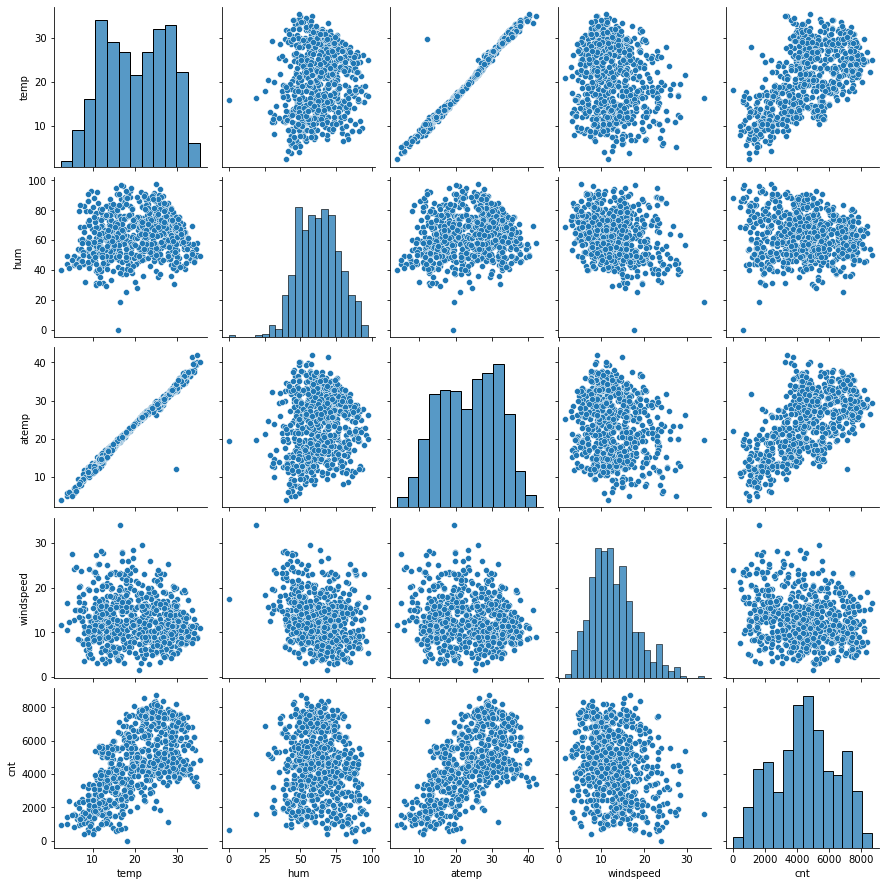

In [15]:
sns.pairplot(df1, vars=['temp','hum','atemp','windspeed',"cnt"])
plt.show()

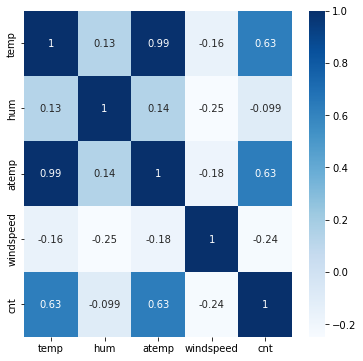

In [16]:
plt.figure(figsize = (6,6))
sns.heatmap(df1[['temp','hum','atemp','windspeed',"cnt"]].corr(), annot = True, cmap="Blues")
plt.show()

#### Views

###### 1. There is linear relationship between temp and atemp, but due to multicolinearity both parameters cannot be used, based on VIF and p-value we wiil decide which variable to keep.

###### 2. There is some positive linear trend between temp-cnt and atemp-cnt

In [17]:
# visaulising the categorical variables

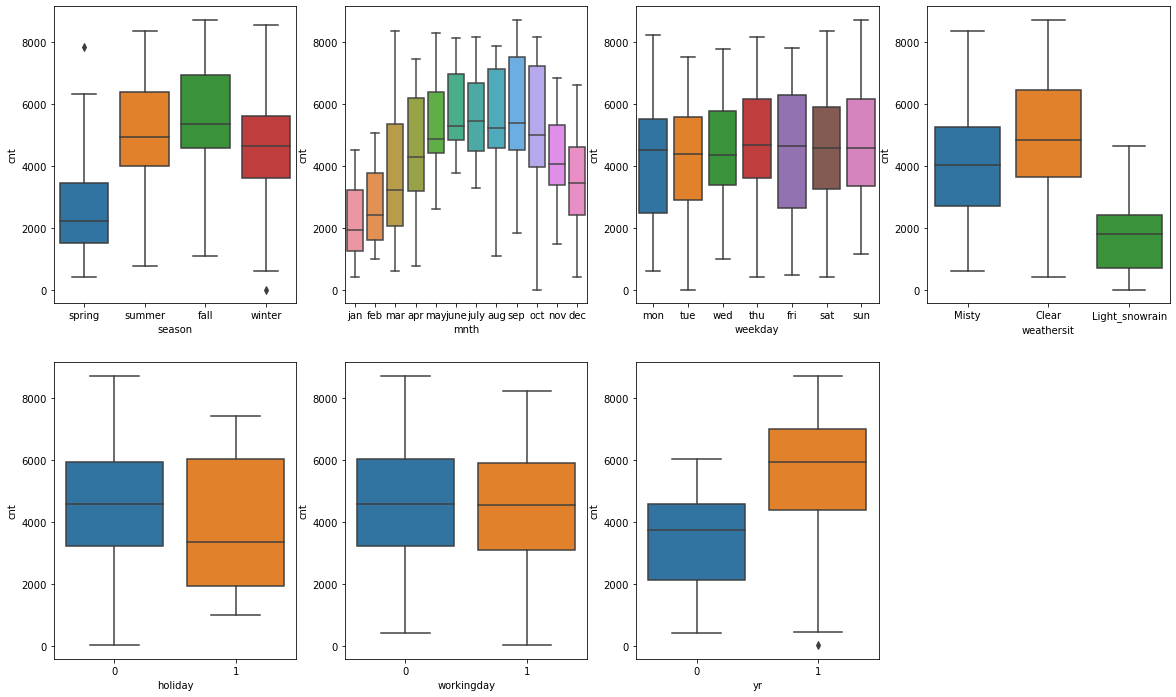

In [18]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df1)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df1)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df1)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df1)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df1)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df1)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df1)
plt.show()

#### Views

###### season: summer and fall season has the highest number of bookings with a median of over 5000 booking.

###### mnth: may,june,july ,august,sepetember & october has the highest number if bike booking with a median of over 4000 booking per month.


###### weathersit: clear weather has the highest number of booking with a median of close to 5000 booking 


###### holiday: Most of the bike booking were happening when it is not a holiday.


###### yr: 2019 is year with highest number of bike booking.

# STEP 3: DATA PREPARATION

In [19]:
# Creating dummy variable for month, weekday, weathersit and season variables.

df1_months=pd.get_dummies(df1.mnth,drop_first=True)
df1_weekdays=pd.get_dummies(df1.weekday,drop_first=True)
df1_weathersit=pd.get_dummies(df1.weathersit,drop_first=True)
df1_seasons=pd.get_dummies(df1.season,drop_first=True)

In [20]:
# Add the results to the original dataframe
new_df = pd.concat([df1,df1_months,df1_weekdays,df1_weathersit,df1_seasons],axis=1)

In [21]:
new_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,1,0,0
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [22]:
new_df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [23]:
new_df.shape

(730, 30)

In [24]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

# Step 4: Splitting the Data into Training and Testing Sets

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
np.random.seed(0)
df_train, df_test = train_test_split(new_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [27]:
df_train.shape


(510, 30)

In [28]:
df_test.shape

(219, 30)

In [29]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,0,1,0,0,0,0,1
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,0,1,0,0,0,0,1,0,1,0


In [30]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.711765,20.102429,23.493909,63.112926,12.831318,4486.382353,0.096078,0.084314,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.453386,7.431169,8.090038,14.156632,5.291832,1952.158739,0.294988,0.278131,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,20.209597,24.020400,63.437500,12.083182,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


###### Rescaling the Features

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler()

In [33]:
num_var=['atemp', 'hum','temp','windspeed','cnt']

In [34]:
df_train[num_var] = scaler.fit_transform(df_train[num_var])

In [35]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,1,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,1,0,0,0,0,1,0,1,0


In [36]:
df_train.describe(include='all')

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.096078,0.084314,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.294988,0.278131,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


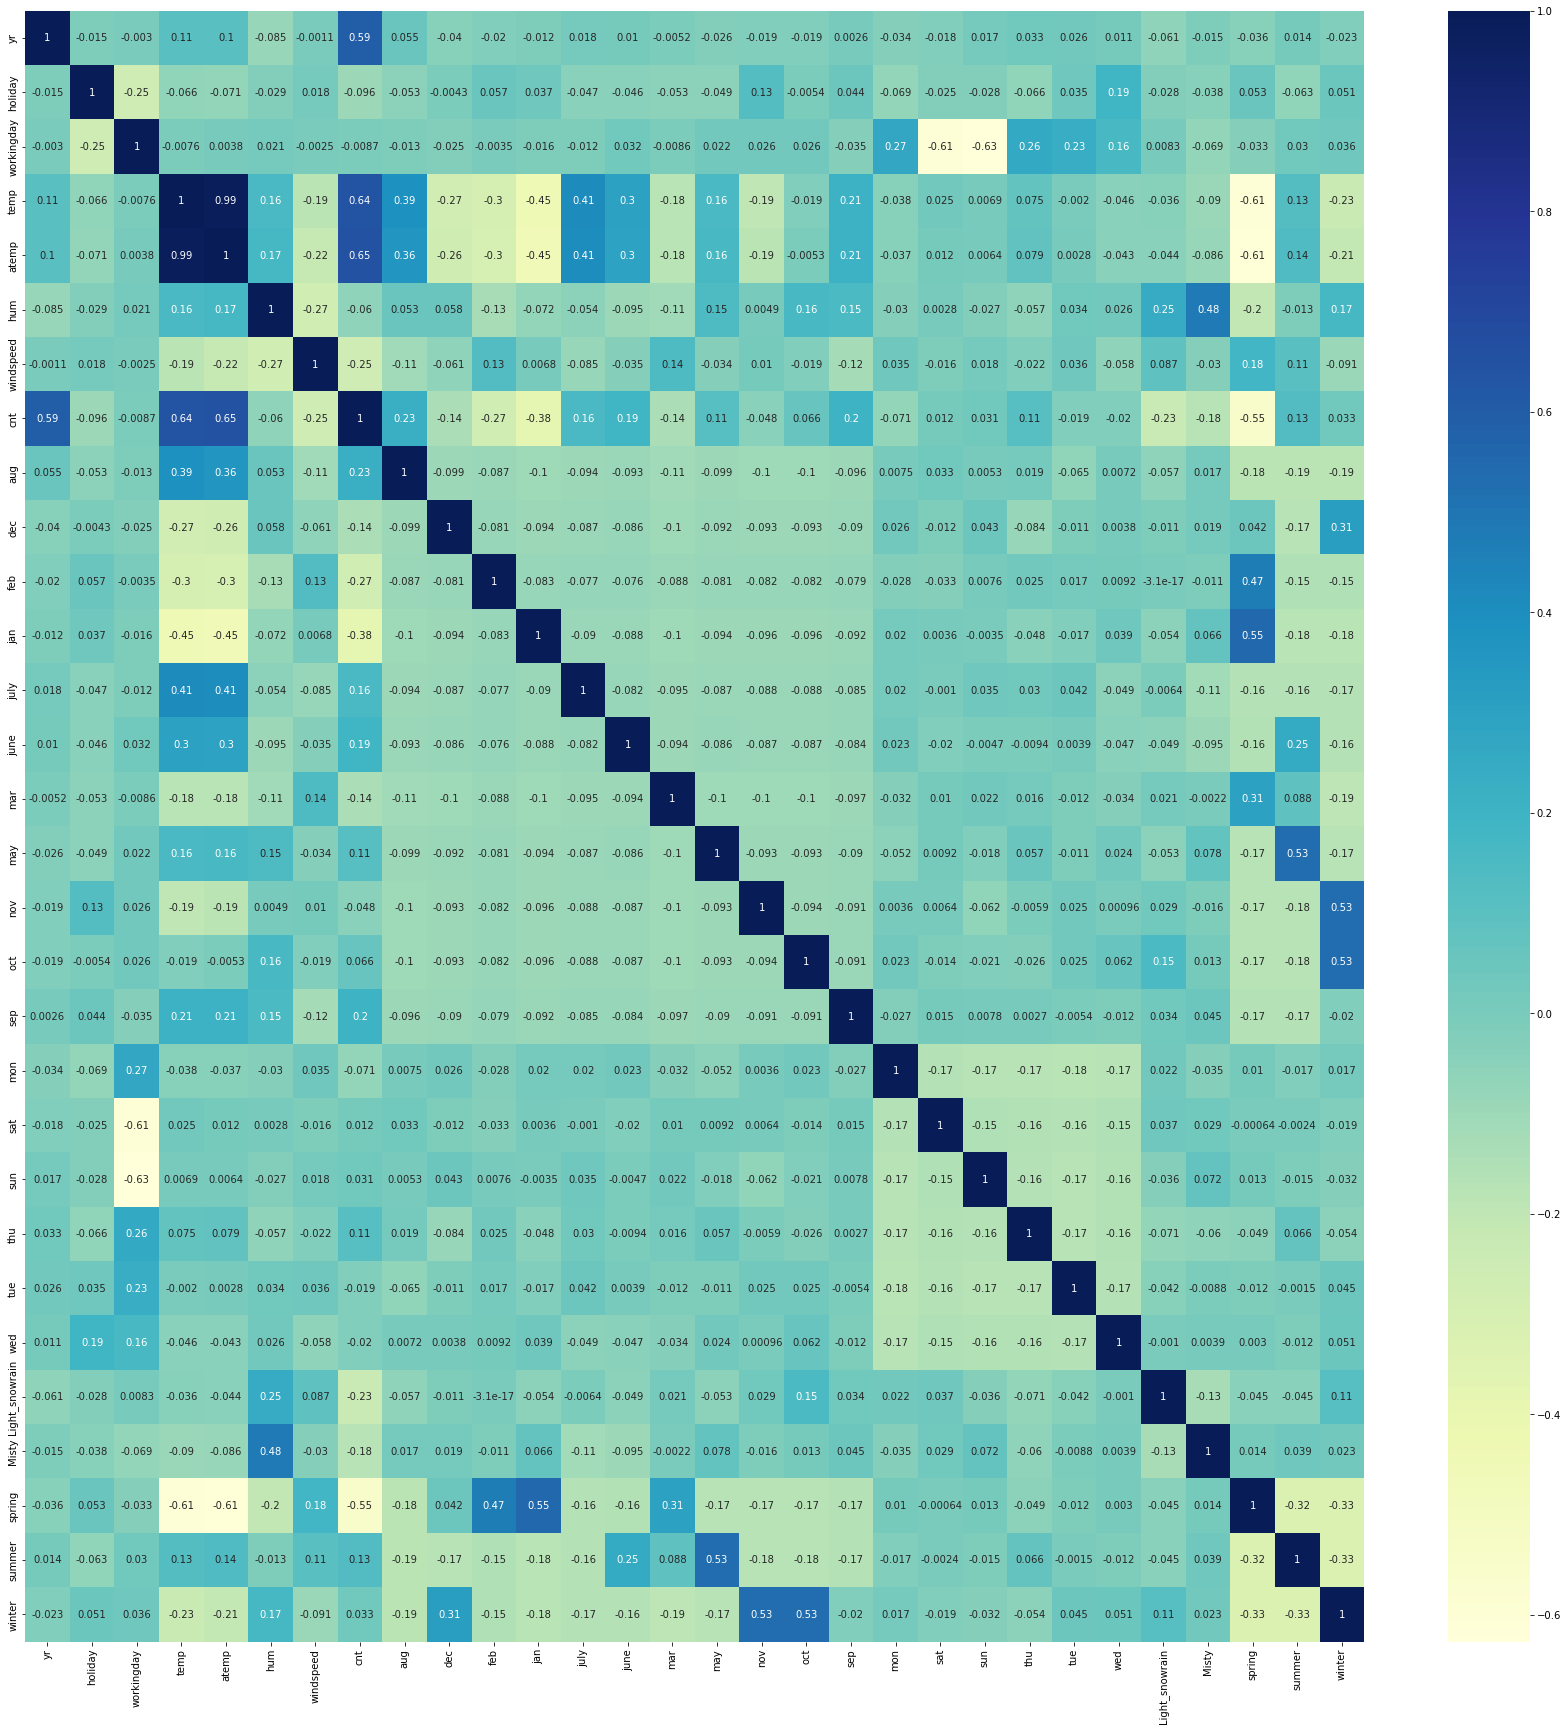

In [37]:
# Let's check the correlation coefficients
plt.figure(figsize = (30,30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

###### CNT is our target variable and it seems to have correlation with year and temp variable. 

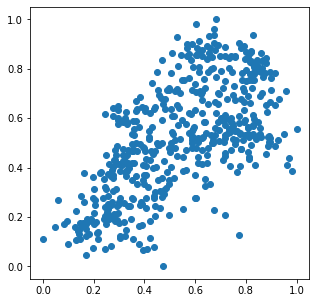

In [38]:
#Let's see a pairplot for CNT vs temp.

plt.figure(figsize=[5,5])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

###### As visualisation show the positive relationship between temp and cnt

#### Dividing into X and Y sets for the model building

In [39]:
y_train = df_train.pop('cnt')
X_train = df_train

In [40]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [41]:
y_train.shape

(510,)

# Step 5: Building a linear model

In [42]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [43]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)

In [44]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 7),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', False, 4),
 ('sun', False, 5),
 ('thu', False, 13),
 ('tue', False, 8),
 ('wed', False, 11),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [45]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'dec', 'jan', 'july',
       'nov', 'sep', 'Light_snowrain', 'Misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [46]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [47]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [48]:
# calculating vif
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [49]:
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
12,spring,4.37
14,winter,4.06
13,summer,2.81
11,Misty,2.32
0,yr,2.09
8,nov,1.83
6,jan,1.75


# model 1

In [50]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm).fit()

In [51]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          3.34e-189
Time:                        15:48:14   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3202      0.036      8.

###### 1. hum has high vif, hence dropping it

# model 2

In [52]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

In [53]:
vif=pd.DataFrame()
vif['Features']=X_train_new.columns
vif['VIF']=[variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
13,winter,2.94
11,spring,2.89
12,summer,2.23
0,yr,2.07
7,nov,1.80
5,jan,1.66
6,july,1.59
10,Misty,1.56


In [54]:
X_train_lm2 = sm.add_constant(X_train_new)

# Creating a new model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [55]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          1.57e-186
Time:                        15:48:14   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2466      0.032      7.679      0.000       0.184       0.310
yr                 0.2343      0.008     28.709      0.000       0.218       0.250
holiday           -0.0919      0.026     -3.533      0.000      -0.143      -0.041
temp               0.4377      0.036     12.083      0.000       0.366       0.509
windspeed         -0.1586      0.025     -6.290      0.000      -0.208      -0.109
dec               -0.0445      0.018     -2.520      0.012      -0.079      -0.010
jan               -0.0503      0.018     -2.738      0.006      -0.086      -0.014
july              -0.0504      0.018     -2.725      0.007      -0.087      -0.014
nov               -0.0419      0.019     -2.198      0.028      -0.079      -0.004
sep                0.0682      0.017      3.992      0.000       0.035       0.102
Light_snowrain    -0.2929      0.025    -11.908      0.000      -0.341      -0.245
Misty             -0.0814      0.009     -9.359      0.000      -0.099      -0.064
spring            -0.0716      0.021     -3.337      0.001      -0.114      -0.029
summer             0.0333      0.015      2.148      0.032       0.003       0.064
winter             0.0887      0.018      4.951      0.000       0.053       0.124
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### As nov has hgh p value, hence we can drop it

## model 3

In [56]:
# as nov has p value we can drop it
X_train_new3 = X_train_new.drop(['nov'], axis = 1)

# calculate VIF for the new model
vif=pd.DataFrame()
vif['Features']=X_train_new3.columns
vif['VIF']=[variance_inflation_factor(X_train_new3.values,i) for i in range(X_train_new3.shape[1])]
vif['VIF']=round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.14
3,windspeed,4.62
10,spring,2.89
11,summer,2.23
0,yr,2.07
12,winter,2.06
5,jan,1.65
6,july,1.59
9,Misty,1.56
7,sep,1.34


In [57]:
X_train_lm3 = sm.add_constant(X_train_new3)

# Creating a new model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [58]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          1.20e-186
Time:                        15:48:14   Log-Likelihood:                 503.13
No. Observations:                 510   AIC:                            -978.3
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2288      0.031      7.

###### As dec has hgh p value, hence we can drop it

## model 4

In [59]:
# as dec has p value we can drop it
X_train_new4 = X_train_new3.drop(['dec'], axis = 1)

# calculate VIF for the new model
vif=pd.DataFrame()
vif['Features']=X_train_new4.columns
vif['VIF']=[variance_inflation_factor(X_train_new4.values,i) for i in range(X_train_new4.shape[1])]
vif['VIF']=round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,4.61
9,spring,2.75
10,summer,2.22
0,yr,2.07
11,winter,1.79
4,jan,1.61
5,july,1.59
8,Misty,1.56
6,sep,1.34


In [60]:
X_train_lm4 = sm.add_constant(X_train_new4)

# Creating a new model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [61]:
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          3.97e-187
Time:                        15:48:15   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2155      0.030      7.

###### As jan has hgh p value, hence we can drop it

# Model 5

In [62]:
# as dec has p value we can drop it
X_train_new5 = X_train_new4.drop(['jan'], axis = 1)

# calculate VIF for the new model
vif=pd.DataFrame()
vif['Features']=X_train_new5.columns
vif['VIF']=[variance_inflation_factor(X_train_new5.values,i) for i in range(X_train_new5.shape[1])]
vif['VIF']=round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
9,summer,2.21
8,spring,2.08
0,yr,2.07
10,winter,1.79
4,july,1.58
7,Misty,1.55
5,sep,1.34
6,Light_snowrain,1.08


In [63]:
X_train_lm5 = sm.add_constant(X_train_new5)

# Creating a new model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [64]:
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          2.40e-187
Time:                        15:48:15   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1996      0.030      6.

###### As july has hgh p value, hence we can drop it

# Model 6

In [65]:
# as dec has p value we can drop it
X_train_new6 = X_train_new5.drop(['july'], axis = 1)

# calculate VIF for the new model
vif=pd.DataFrame()
vif['Features']=X_train_new6.columns
vif['VIF']=[variance_inflation_factor(X_train_new6.values,i) for i in range(X_train_new6.shape[1])]
vif['VIF']=round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.59
2,temp,3.84
0,yr,2.07
7,spring,1.99
8,summer,1.89
9,winter,1.63
6,Misty,1.54
4,sep,1.23
5,Light_snowrain,1.08
1,holiday,1.04


In [66]:
X_train_lm6 = sm.add_constant(X_train_new6)

# Creating a new model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [67]:
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          7.36e-187
Time:                        15:48:15   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1910      0.030      6.

#### Views

###### 1. The 6th model has very low multicollinearity among the predictor variables and significant p values

###### 2. F-Statistic is 249.2, stating the model is good fit

# Step 6: Residual Analysis of the train data¶

In [68]:
y_train_pred= lr6.predict(X_train_lm6)

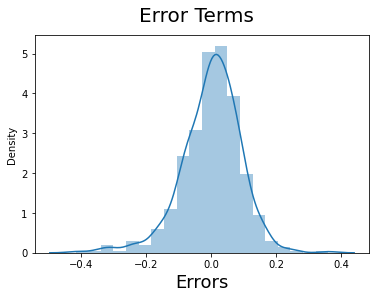

In [69]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()

###### 1. Error terms are normally distributed, hence our assumption is valid

# Step 7: Making Predictions Using the Final Model

In [70]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [71]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.678366,0.342851,1.865042,0.084219,0.692706,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.738463,0.371477,1.725746,0.153728,0.712034,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.402100,0.235489,2.396893,0.334206,0.303382,0,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.721421,0.352932,1.215425,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.665808,0.331786,0.853260,0.537414,0.569029,0,0,...,1,0,0,0,0,0,0,0,1,0


In [72]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.442680,0.249953,1.809432,0.313350,0.520592,0.059361,0.086758,...,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635,0.255708,0.264840,0.232877
std,0.500722,0.188034,0.481313,0.201873,0.085527,0.439359,0.159947,0.218435,0.236840,0.282125,...,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.000103,0.050926,0.698771,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.266209,0.176063,1.481350,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.442464,0.256314,1.777667,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.615578,0.321055,2.120341,0.403048,0.672745,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.810220,0.425781,2.881888,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###### Dividing into X_test and y_test

In [73]:
y_test = df_test.pop('cnt')
X_test = df_test

In [74]:
col1 = X_train_new6.columns

X_test = X_test[col1]

In [75]:
X_test

,yr,holiday,temp,windspeed,sep,Light_snowrain,Misty,spring,summer,winter
184,0,1,0.678366,0.084219,0,0,1,0,0,0
535,1,0,0.738463,0.153728,0,0,0,0,1,0
299,0,0,0.402100,0.334206,0,0,1,0,0,1
221,0,0,0.721421,0.339570,0,0,0,0,0,0
152,0,0,0.665808,0.537414,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
400,1,0,0.182343,0.287411,0,0,1,1,0,0
702,1,0,0.408378,0.283397,0,0,0,0,0,1
127,0,0,0.464887,0.069510,0,0,0,0,1,0
640,1,0,0.603918,0.052115,0,0,1,0,0,1


In [76]:
# Adding constant variable to test dataframe

X_test_m6 = sm.add_constant(X_test)

In [77]:
# Making predictions using the last model

y_pred_m6 = lr6.predict(X_test_m6)

# Step 9: Model Evaluation

Text(0, 0.5, 'y_pred')

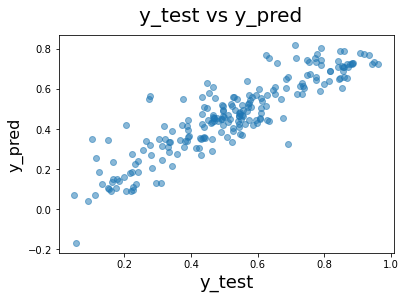

In [78]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m6,alpha=.52)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

###### R-Squared value Test

In [79]:
from sklearn.metrics import r2_score
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test, y_pred_m6))


0.833170119099662
0.731813574255238


In [85]:
r2=r2_score(y_test, y_pred_m6)

###### Adjusted R-Squared value Test

In [86]:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7189


In [87]:
round(lr6.params,4)

const             0.1910
yr                0.2341
holiday          -0.0969
temp              0.4782
windspeed        -0.1482
sep               0.0909
Light_snowrain   -0.2860
Misty            -0.0801
spring           -0.0551
summer            0.0610
winter            0.0959
dtype: float64

## We can see that the equation of our best fitted line is:

###### cnt = 0.1910 + (yr × 0.2341)- (holiday × 0.0969 ) + (temp × 0.4782) − (windspeed × 0.1482) + (sep × 0.0909) - (Light_snowrain × 0.2860) - (Misty  × 0.0801) - (spring  × 0.0551)+ (summer× 0.0610) + (winter × 0.0959)

## final predictor variables

yr                
holiday         
temp             
windspeed        
sep               
Light_snowrain   
Misty            
spring           
summer            
winter

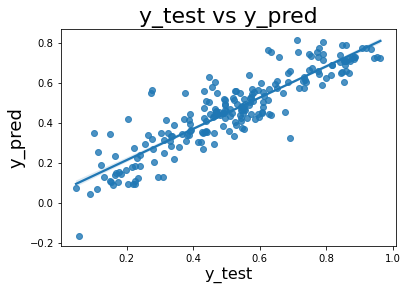

In [90]:
# Visualizing the fit on the test data, hence plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred_m6, ci=69, fit_reg=True)
plt.title('y_test vs y_pred', fontsize=22)
plt.xlabel('y_test', fontsize=16)
plt.ylabel('y_pred', fontsize=18)
plt.show()